In [1]:
from models.CNN import CNN, plot_training
from torch.utils.data import DataLoader
from utils.customDataset import CustomDataset
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

## Loading Data

In [2]:
df_data = pd.read_csv('../data/train.csv')
df_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [3]:
X_filenames = df_data.iloc[:,0].values
species = df_data['species'].unique()

# Creation of the targets vector
t = np.zeros((len(X_filenames),species.size)) 
for i in range(species.size):
    t[df_data['species'] == species[i], i] = 1

In [4]:
X_train_filenames, X_test_filenames, t_train, t_test = train_test_split(X_filenames, t, test_size=0.3, random_state=0)

In [5]:
img_size = 32

batch_size = 1

dataset_train = CustomDataset('../data/images', filenames=X_train_filenames, targets=t_train, classes=species, img_size=img_size)
dataset_test = CustomDataset('../data/images', filenames=X_test_filenames, targets=t_test, classes=species, img_size=img_size)
train_dataloader = DataLoader(dataset_train, batch_size=batch_size)
test_dataloader = DataLoader(dataset_train, batch_size=batch_size)

## CNN without regularization

In [6]:
model = CNN(num_epochs=100)
model.set_model(output_size=species.size)
model.set_optimizer(optim='SGD', lr=1e-3, reg=0)

In [7]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(train_dataloader, test_dataloader)

Epoch 1/100, Loss: 4.58880, Accuracy: 2.16%
Epoch 2/100, Loss: 4.16693, Accuracy: 8.23%
Epoch 3/100, Loss: 3.50050, Accuracy: 16.88%
Epoch 4/100, Loss: 2.83403, Accuracy: 28.72%
Epoch 5/100, Loss: 2.33612, Accuracy: 36.80%
Epoch 6/100, Loss: 1.92939, Accuracy: 46.90%
Epoch 7/100, Loss: 1.62808, Accuracy: 54.55%
Epoch 8/100, Loss: 1.40059, Accuracy: 59.74%
Epoch 9/100, Loss: 1.22031, Accuracy: 62.91%
Epoch 10/100, Loss: 1.04227, Accuracy: 67.10%
Epoch 11/100, Loss: 0.86864, Accuracy: 74.46%
Epoch 12/100, Loss: 0.84050, Accuracy: 74.31%
Epoch 13/100, Loss: 0.72407, Accuracy: 77.20%
Epoch 14/100, Loss: 0.66888, Accuracy: 79.65%
Epoch 15/100, Loss: 0.63021, Accuracy: 81.82%
Epoch 16/100, Loss: 0.51628, Accuracy: 83.98%
Epoch 17/100, Loss: 0.50975, Accuracy: 84.56%
Epoch 18/100, Loss: 0.45149, Accuracy: 85.86%
Epoch 19/100, Loss: 0.35830, Accuracy: 89.32%
Epoch 20/100, Loss: 0.32718, Accuracy: 90.33%
Epoch 21/100, Loss: 0.30685, Accuracy: 90.62%
Epoch 22/100, Loss: 0.33875, Accuracy: 89.03%

In [8]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 99.86% on test data


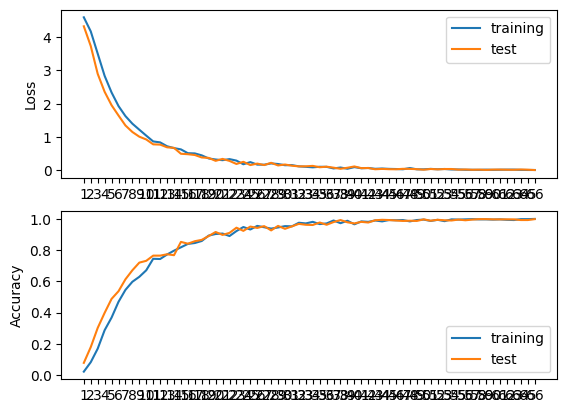

In [9]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test)

## CNN with regularization

In [11]:
model_reg = CNN(num_epochs=100)
model_reg.set_model(output_size=species.size)
model_reg.set_optimizer(optim='SGD', lr=1e-3, reg=1e-4)

In [12]:
loss_train, accuracy_train, loss_test, accuracy_test = model_reg.training(train_dataloader, test_dataloader)

Epoch 1/100, Loss: 4.57436, Accuracy: 2.02%
Epoch 2/100, Loss: 4.15741, Accuracy: 8.66%
Epoch 3/100, Loss: 3.56662, Accuracy: 16.16%
Epoch 4/100, Loss: 2.88874, Accuracy: 27.85%
Epoch 5/100, Loss: 2.44702, Accuracy: 34.63%
Epoch 6/100, Loss: 2.05346, Accuracy: 42.86%
Epoch 7/100, Loss: 1.74118, Accuracy: 48.34%
Epoch 8/100, Loss: 1.51004, Accuracy: 53.97%
Epoch 9/100, Loss: 1.41800, Accuracy: 58.01%
Epoch 10/100, Loss: 1.17685, Accuracy: 63.06%
Epoch 11/100, Loss: 1.03528, Accuracy: 69.55%
Epoch 12/100, Loss: 0.91839, Accuracy: 72.15%
Epoch 13/100, Loss: 0.80216, Accuracy: 73.59%
Epoch 14/100, Loss: 0.75525, Accuracy: 75.76%
Epoch 15/100, Loss: 0.63135, Accuracy: 79.08%
Epoch 16/100, Loss: 0.56250, Accuracy: 81.96%
Epoch 17/100, Loss: 0.53515, Accuracy: 83.55%
Epoch 18/100, Loss: 0.49085, Accuracy: 83.26%
Epoch 19/100, Loss: 0.38790, Accuracy: 87.73%
Epoch 20/100, Loss: 0.39351, Accuracy: 87.88%
Epoch 21/100, Loss: 0.36467, Accuracy: 88.60%
Epoch 22/100, Loss: 0.34665, Accuracy: 89.18%

In [13]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 100.00% on test data


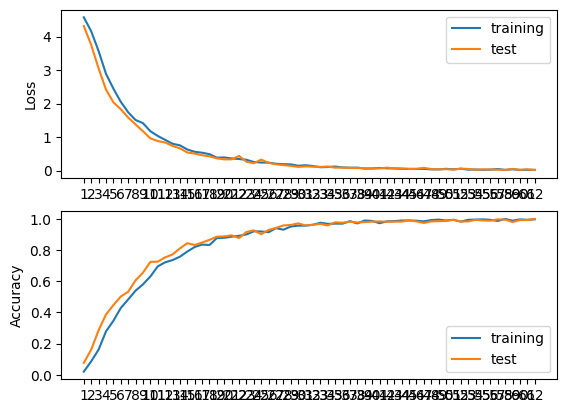

In [14]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test)

## CNN with PReLU function

In [15]:
model = CNN(num_epochs=100)
model.set_model(output_size=species.size, activation_function='prelu')
model.set_optimizer(optim='SGD', lr=1e-3, reg=0)

In [16]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(train_dataloader, test_dataloader)

Epoch 1/100, Loss: 4.58777, Accuracy: 2.02%
Epoch 2/100, Loss: 4.07691, Accuracy: 11.11%
Epoch 3/100, Loss: 3.10480, Accuracy: 24.24%
Epoch 4/100, Loss: 2.34843, Accuracy: 37.95%
Epoch 5/100, Loss: 1.80383, Accuracy: 48.63%
Epoch 6/100, Loss: 1.41324, Accuracy: 61.18%
Epoch 7/100, Loss: 1.17599, Accuracy: 66.09%
Epoch 8/100, Loss: 0.99210, Accuracy: 69.99%
Epoch 9/100, Loss: 0.78696, Accuracy: 76.05%
Epoch 10/100, Loss: 0.68031, Accuracy: 78.50%
Epoch 11/100, Loss: 0.56174, Accuracy: 82.54%
Epoch 12/100, Loss: 0.48317, Accuracy: 85.71%
Epoch 13/100, Loss: 0.43758, Accuracy: 86.15%
Epoch 14/100, Loss: 0.40323, Accuracy: 86.58%
Epoch 15/100, Loss: 0.30510, Accuracy: 92.64%
Epoch 16/100, Loss: 0.27010, Accuracy: 91.77%
Epoch 17/100, Loss: 0.29182, Accuracy: 89.32%
Epoch 18/100, Loss: 0.26172, Accuracy: 91.77%
Epoch 19/100, Loss: 0.19201, Accuracy: 94.66%
Epoch 20/100, Loss: 0.16642, Accuracy: 94.95%
Epoch 21/100, Loss: 0.16590, Accuracy: 94.95%
Epoch 22/100, Loss: 0.13197, Accuracy: 95.67

In [17]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 99.86% on test data


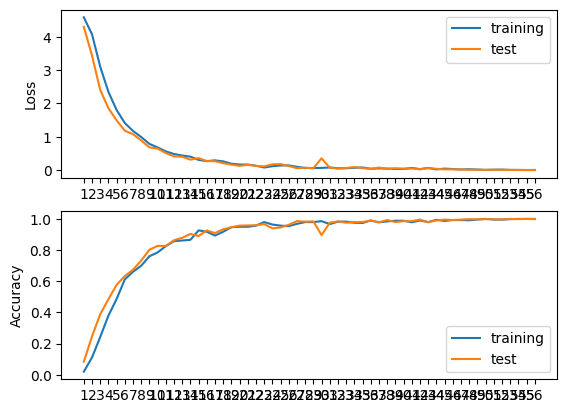

In [18]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test)